<a href="https://colab.research.google.com/github/cr21/Behavior-of-Linear-Model-Machine-Learning-Study/blob/main/ImbalanaceDataStudyLinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task we will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in  learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

In [ ]:
# create new 2d imbalanced dataset 
ratios = [(100,2),(100,20), (100,40),(100,80)]
points=[]
for idx,ratio in enumerate(ratios):
  # positive points
  xp = np.random.normal(0,0.05, size=(ratio[0],2))
  # negative points
  xn = np.random.normal(0.13,0.02, size=(ratio[1],2))
  # generate labels for positive and negative points
  yp = np.array([1]*ratio[0]).reshape(-1,1)
  yn = np.array([0]*ratio[1]).reshape(-1,1)
  X = np.vstack((xp,xn))
  Y = np.vstack((yp,yn))
  points.append((X,Y))

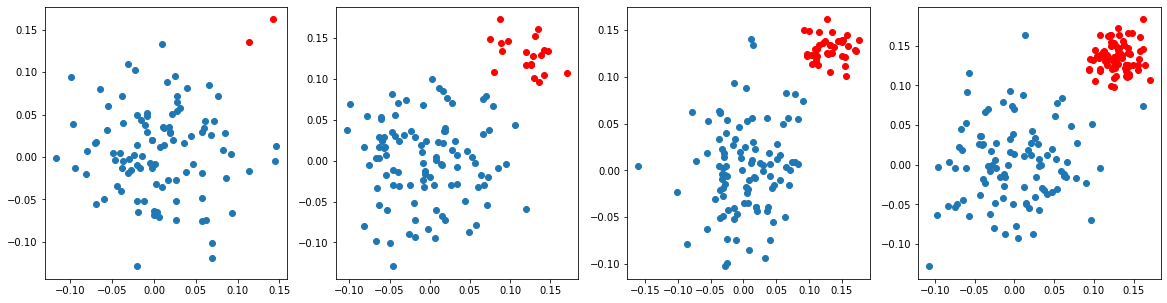

In [ ]:
# plot the imbalanced dataset
plt.figure(figsize=(20,5))

for idx, data in enumerate(points):
  plt.subplot(1,4,idx+1)
  postiveidx = ratios[idx][0]-1
  negativeidx = ratios[idx][0]

  plt.scatter(data[0][:postiveidx,0], data[0][:postiveidx,1])
  plt.scatter(data[0][negativeidx:,0], data[0][negativeidx:,1], color='red')


## Task 1: Applying SVM

In [ ]:

ratios = [(100,2),(100,20), (100,40),(100,80)]

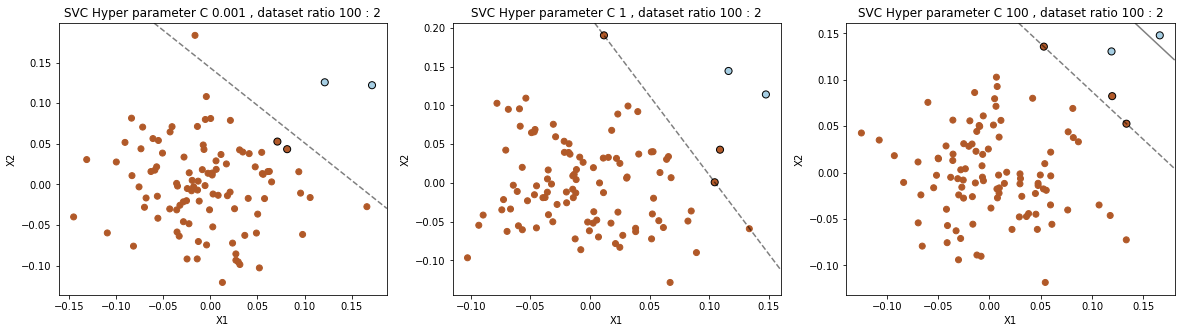

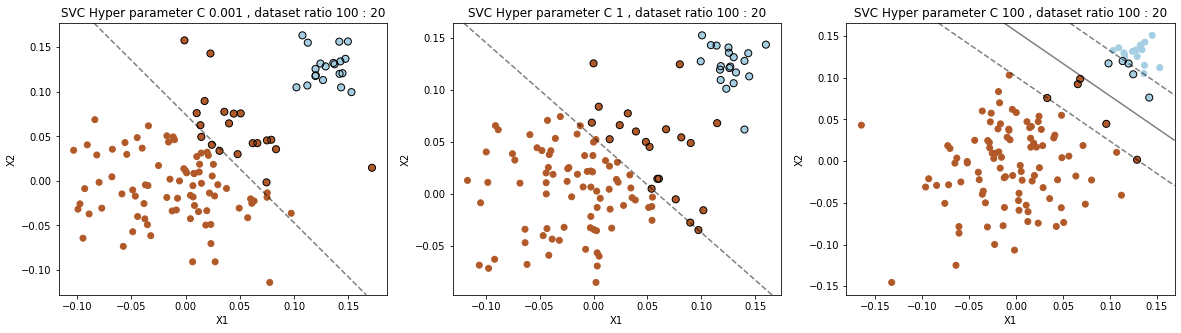

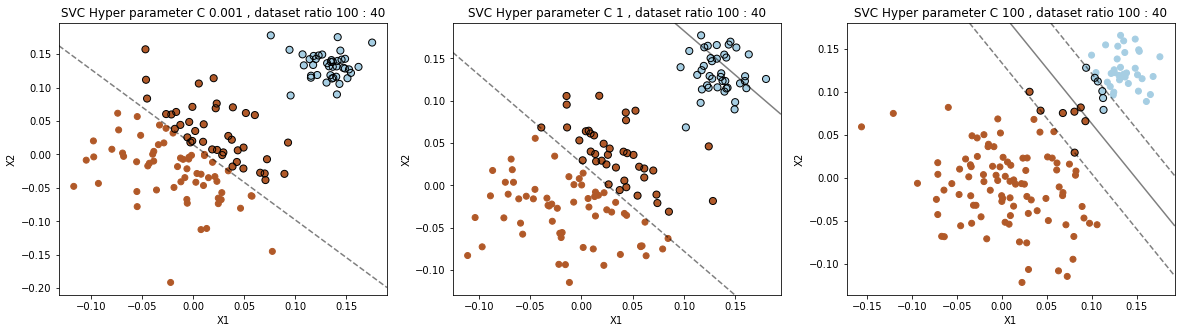

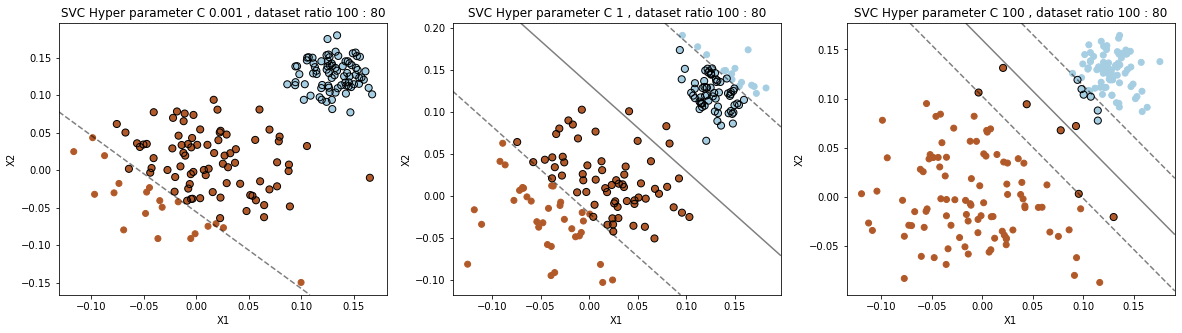

In [ ]:
C = [0.001,1,100]


for idx,ratio in enumerate(ratios):
  # generate points
  plt.figure(figsize=(20,5))
  for id,c in enumerate(C) :
    plt.subplot(1,len(C),id+1)
    xp = np.random.normal(0.0, 0.05, size=(ratio[0],2))
    xn = np.random.normal(0.13, 0.02, size=(ratio[1],2))
    # generate labels
    yp = np.array([1]*ratio[0]).reshape(-1,1)
    yn = np.array([0]*ratio[1]).reshape(-1,1)
    # build dataset
    X = np.vstack((xp,xn))
    Y = np.vstack((yp,yn))
    # run svm classfier

    svc_clf = SVC(C=c, kernel='linear')
    svc_clf.fit(X,Y)

    postiveidx = ratio[0]-1
    negativeidx = ratio[0]
    plt.title(f'SVC Hyper parameter C {c} , dataset ratio {ratio[0] } : {ratio[1]}')
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Paired)
    plt.xlabel('X1')
    plt.ylabel('X2')
    # plt.scatter(X[negativeidx:,0], X[negativeidx:,1], color='red',cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1])
    yy = np.linspace(ylim[0], ylim[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc_clf.decision_function(xy).reshape(XX.shape)

    # # # plot decision boundary and margins
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    # plot support vectors
    
    ax.scatter(svc_clf.support_vectors_[:, 0], svc_clf.support_vectors_[:, 1], s=50,
              linewidth=1, facecolors='none', edgecolors='k')
    # plt.savefig()
  plt.show()
  

## Observation

### For C = 0.001 
#### for Dataset 1 (100:2)  model is  underfited
#### for Dataset 2 (100:20) model is underfited than dataset 1
#### for Dataset 3 (100:40) model is more underfited than dataset 2
#### for Dataset 4 (100:80) model is by far most underfited
<hr>

### For C = 1 
#### for Dataset 1 (100:2)  model is  underfited
#### for Dataset 2 (100:20) model is underfited than dataset 1
#### for Dataset 3 (100:40) model is more underfited than dataset 2
#### for Dataset 4 (100:80) model is highly underfited

<hr>

### For C = 100

#### for Dataset 1 (100:2)  model is slightly underfited,  but better than previous c =0.01 and c=1
#### for Dataset 2 (100:20) model is  fited well
#### for Dataset 3 (100:40) model is very slightly overfited 
#### for Dataset 4 (100:80) model is fitted well




## Task 2: Applying LR

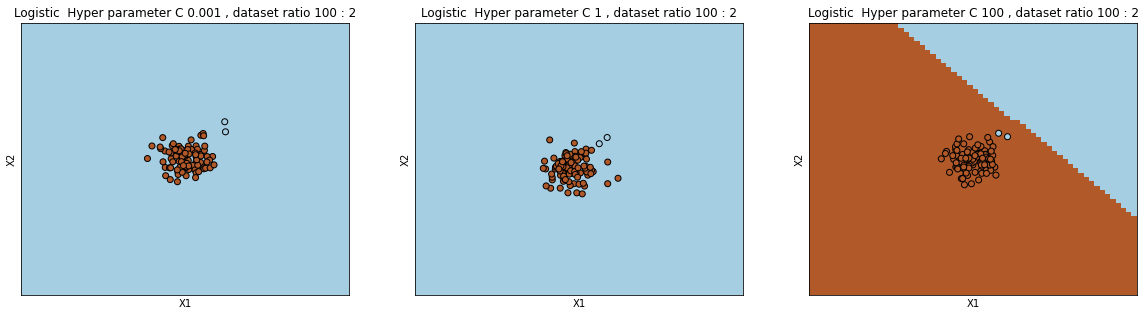

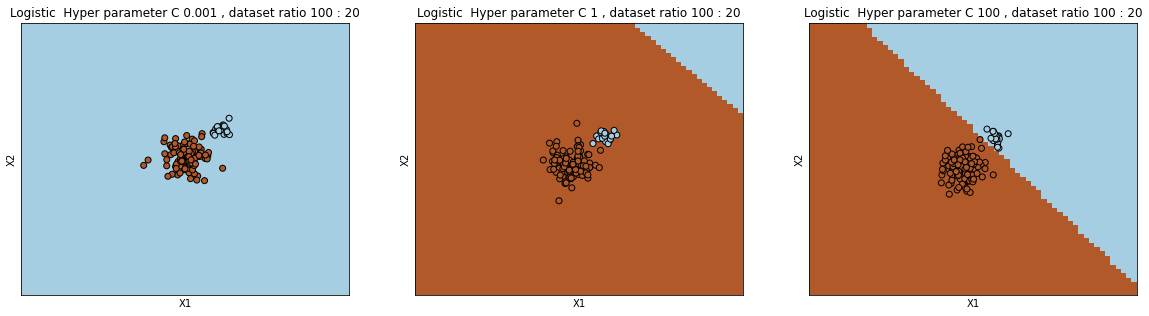

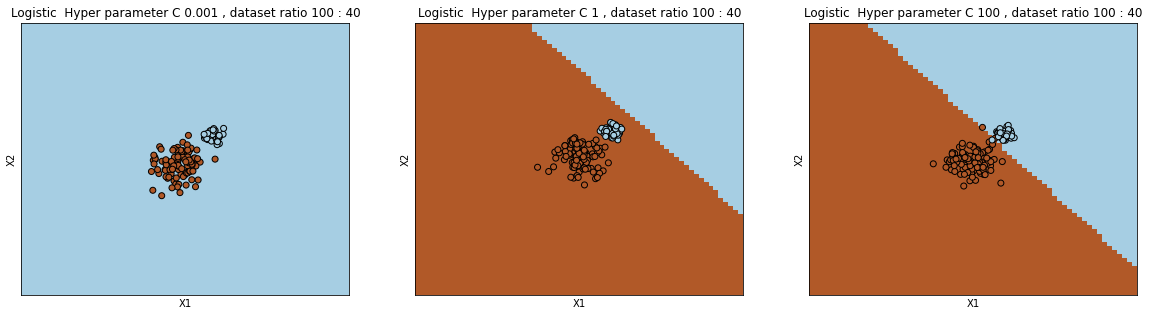

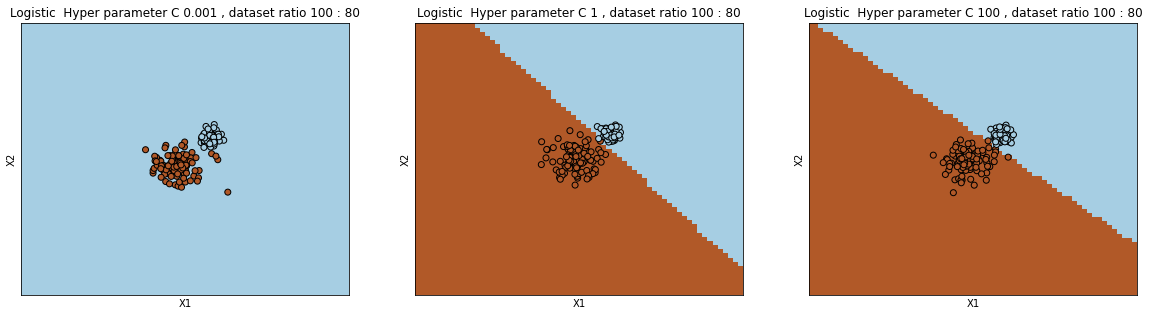

In [ ]:


C = [0.001,1,100]


for idx,ratio in enumerate(ratios):
  # generate points
  plt.figure(figsize=(20,5))
  for id,c in enumerate(C) :
    plt.subplot(1,len(C),id+1)
    xp = np.random.normal(0.0, 0.05, size=(ratio[0],2))
    xn = np.random.normal(0.13, 0.02, size=(ratio[1],2))
    # generate labels
    yp = np.array([1]*ratio[0]).reshape(-1,1)
    yn = np.array([0]*ratio[1]).reshape(-1,1)
    # build dataset
    X = np.vstack((xp,xn))
    Y = np.vstack((yp,yn))
    # run svm classfier

    logistic_clf = LogisticRegression(penalty='l2',C=c)
    logistic_clf.fit(X,Y)

    x_min,x_max = X[:,0].min()-0.5 , X[:,0].max()+0.5
    y_min,y_max = X[:,0].min()-0.5 , X[:,0].max()+0.5
    stride = 0.02
    xx,yy = np.meshgrid(np.arange(x_min,x_max,stride), np.arange(y_min,y_max,stride))
    
    Z = logistic_clf.predict(np.c_[xx.ravel(),yy.ravel()])

    Z = Z.reshape(xx.shape)
    # # # # plot decision boundary and margins
    plt.figure(1,figsize=(4,3))
    plt.pcolormesh(xx, yy, Z,cmap=plt.cm.Paired)
    # plt.contour(xx, yy, Z, colors='k')
    plt.title(f'Logistic  Hyper parameter C {c} , dataset ratio {ratio[0] } : {ratio[1]}')
    plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k',cmap=plt.cm.Paired)
    plt.ylim(yy.min(),yy.max())
    plt.xlim(xx.min(), xx.max())
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    
  plt.show()
  

## Observation

### for C = 0.001 
#### All the dataset we could not able to find decision boundry it is highlt underfited
<hr>

### for C = 1 

#### for Dataset 1 (100:2) and Dataset 2 (100:20) model is highly underfited, most probable reason is class imbalanace
#### for Dataset 3 (100:40) model is slightly underfited
#### for Dataset 4 (100:80) model is fitted well

<hr>
### for C = 100

#### for Dataset 1 (100:2)  model is slightly underfited,  most probable reason is class imbalanace, this model is better than model for C =0.001 and C = 1
#### for Dataset 2 (100:20) model is overfited
#### for Dataset 3 (100:40) model is overfited but less than dataset 2
#### for Dataset 4 (100:80) model is fitted well


